<center>

# <span style="color:red"> Funzione di auto-correlazione </span>

</center>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

from scipy.optimize import curve_fit

La funzione di auto-correlazione per la magnetizzazione, definita come 

$$
\chi\left(t\right)\,=\,\frac{\left<m\left(t'\right)m\left(t\,+\,t'\right)\right>_{t'}\,-\,\left<m\right>^2}{\sigma_m^2}
$$

consente di calcolare il tempo di autocorrelazione, ossia il tempo necessario per far sì che due stime di una qualche osservabile risultino essere statisticamente indipendenti fra loro. Dal punto di vista puramente computazionale, possiamo valutare tale quantità come

$$
AC_{\left[m\right]}\,=\,\frac{\frac{1}{n_{max}\,-\,n}\sum_{i=0}^{n_{max}-n}m\left(i\right)m\left(i\,+\,n\right)\,-\,\frac{1}{n_{max}\,-\,n}\sum_{i=0}^{n_{max}-n}m\left(i\right)\,\cdot\,\frac{1}{n_{max}\,-\,n}\sum_{i=0}^{n_{max}-n}m\left(i\,+\,n\right)}{\frac{1}{n_{max}}\sum_{i=0}^{n_{max}}x^2\left(i\right)\,-\,\left(\frac{1}{n_{max}}\sum_{i=0}^{n_{max}}m\left(i\right)\right)^2}
$$

# Esempio di calcolo della funzione di autocorrelazione

In [2]:
def ACF(x, tauto):
    ac = np.zeros(tauto)

    # Autocorrelazione con se stesso è uno
    ac[0] = 1
    tmax = len(x)

    # Calcolo i termini del denominatore
    med = np.mean(x[0:tmax])**2
    medsq = np.mean(x[0:tmax]*x[0:tmax])

    # Calcolo dell'autocorrelazione fino a tmax-1
    for t in range(1, tauto):

        # Calcolo i termini del numeratore
        medP = np.mean(x[0:tmax-t] * x[t:tmax])
        med1 = np.mean(x[0:tmax-t])
        med2 = np.mean(x[t:tmax])

        ac[t] = (medP - med1*med2)/(medsq - med)       

    return ac


def exponential_func(x, b):
    return np.exp(-b * x)

In [6]:
##Carico dati da file
obs = np.loadtxt("tcorr_t2.15_size100_seed1.out")
maxstep = 2000
zoom = 1000


# Calcolo dell'autocorrelazione
magn = obs[:, 2]
blk = obs[:, 3]
dimblk = np.mean(blk)/(100*100)
automagn = ACF(magn,int(maxstep/dimblk))

# Fit esponenziale
params, cov = curve_fit(exponential_func, obs[0:int(maxstep/dimblk), 0]*int(maxstep/dimblk), automagn)
b_fit = params[0]
x_fit = np.array(obs[0:zoom, 0])
y_fit = exponential_func(x_fit, b_fit)

ValueError: operands could not be broadcast together with shapes (2000,) (2855,) 

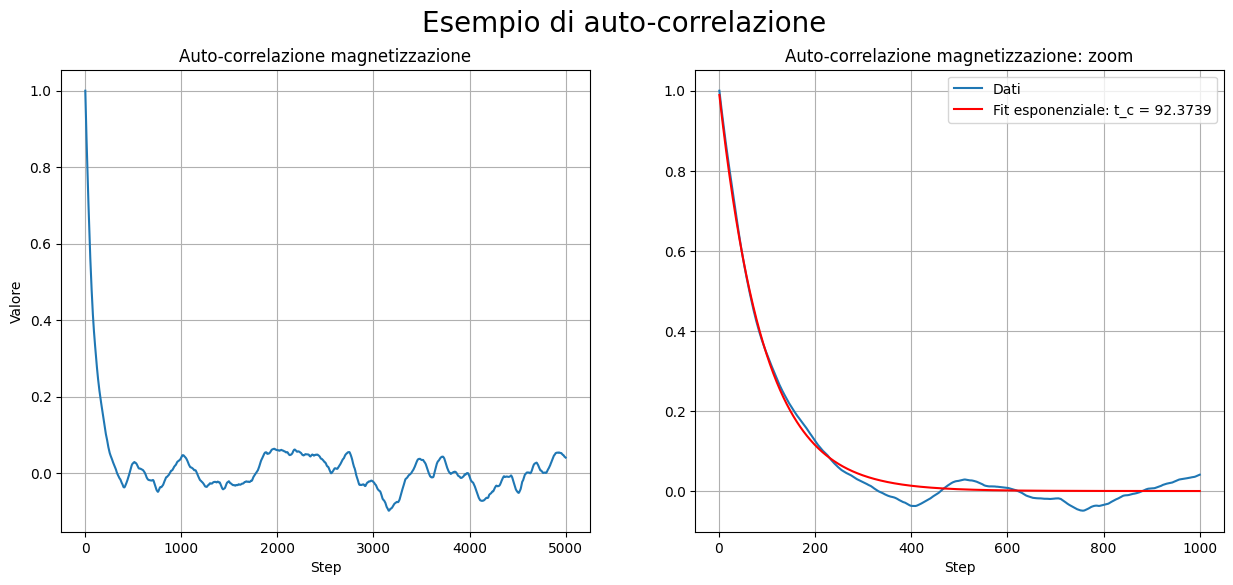

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(obs[0:maxstep, 0], automagn[0:maxstep])
ax[0].set_title("Auto-correlazione magnetizzazione")
ax[0].set_ylabel(r'Valore')
ax[0].set_xlabel('Step')
ax[0].grid()
                


ax[1].plot(obs[0:zoom, 0], automagn[0:zoom], label = 'Dati')
ax[1].plot(x_fit, y_fit, label='Fit esponenziale: t_c = ' + str(round(1/float(b_fit), 4)), color = 'red')
ax[1].set_title('Auto-correlazione magnetizzazione: zoom')
ax[1].legend(loc = 'best')
ax[1].set_xlabel('Step')
ax[1].grid()

fig.suptitle(f"Esempio di auto-correlazione", fontsize = 20)
plt.show()

## Analisi sistematica dello spazio dei parametri

In [8]:
size_t = np.array(['100', '200', '300', '400', '500'])
temp_t = np.array(['1.0', '1.5', '2.0', '2.5', '3.0', '3.5'])
seed_t = np.array(['1', '2', '3', '4'])

for size in size_t:
    for temp in temp_t:
        for seed in seed_t:

            name = 'tcorr_t' + temp + '_size' + size + '_seed' + seed + '.out'
            obs = np.loadtxt(name)

            autom_c = ACF(obs[:, 2], maxstep)
            with open('autofunc/' + name, 'w') as file:
                for a in autom_c:
                    file.write(f"{a}\n")

            
    print("Finita analisi per Ising di dimensione: n = " + size)

Finita analisi per Ising di dimensione: n = 100
Finita analisi per Ising di dimensione: n = 200
Finita analisi per Ising di dimensione: n = 300
Finita analisi per Ising di dimensione: n = 400
Finita analisi per Ising di dimensione: n = 500
